
#### Three ish graphs 
- residual plot of our prediction vs baseline 
- scatter plot of true y and test y
---

## **Evaluation and Conceptual Understanding**
- The baseline score (or baseline prediction) is the average sale price of homes. 

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('./datasets/train_features_for_gridsearch')

In [3]:
train.shape

(2051, 168)

In [4]:
train.head()

,Unnamed: 0,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,...,Garage Area^2,Garage Area Yr Sold,Garage Area baths,Yr Sold homeage,Yr Sold baths,Yr Sold garageage,baths^2,Foundation_PConc,Bsmt Qual_Ex,Kitchen Qual_Ex
0,0,-0.078644,0.142227,0.989479,1.092329,-0.741232,-1.108838,-0.040634,0.769779,-0.279441,...,-0.199323,0.008581,0.496281,-0.067210,1.160521,0.203566,1.138397,0,0,0
1,1,0.622656,0.805126,0.609090,0.191491,-0.322705,-0.634510,1.244529,0.769779,1.002738,...,0.182637,0.396922,0.848706,-0.763445,1.158568,-0.686130,1.138397,1,0,0
2,2,-0.779944,-0.620106,1.084576,-0.565901,-0.002130,-0.271195,-0.884084,-1.051232,-0.920531,...,-0.925409,-1.053629,-1.083758,0.695100,-1.194594,1.133449,-1.046041,0,0,0
3,3,-0.779944,1.136575,1.084576,-0.565901,-1.500370,-1.060900,-0.110588,0.769779,0.361648,...,-0.487916,-0.339305,0.181616,-1.061526,1.160521,-1.049756,1.138397,1,0,0
4,4,-0.078644,-2.376787,0.418896,-0.565901,-0.850317,-0.841397,-0.108589,0.769779,-0.279441,...,-0.161367,0.050327,0.127913,2.451726,0.375483,0.971731,0.202209,1,0,0


In [5]:
train.drop(labels = 'Unnamed: 0', axis = 1, inplace= True )

In [6]:
train.shape
#train is all my 167 features 

(2051, 167)

In [7]:
d1 = pd.read_csv('./datasets/df_with_dummy.csv')


In [8]:
y = d1['SalePrice']

In [9]:
X = train

In [10]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import r2_score

In [11]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#instantiate the models
lr = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()
elastic = ElasticNetCV()

In [13]:
cross_val_score(lr, X_train, y_train, cv= 10).mean()

0.862850248245848

In [14]:
cross_val_score(lasso, X_train, y_train, cv= 10).mean()

/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify 

/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

0.7825381459907108

In [15]:
cross_val_score(ridge, X_train, y_train, cv= 10).mean()

0.8666884410407742

In [16]:
cross_val_score(elastic, X_train, y_train, cv= 10).mean()

/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/erinhwang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a va

0.6003718329968822

In [17]:
#proceeding with ridge 
# lets fit ridge 
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [18]:
ridge.score(X_train, y_train)

0.9283344627138852

In [19]:
ridge.score(X_test, y_test)

0.9031217146246528

In [20]:
predictions = ridge.predict(X_test)

In [21]:
residuals = y_test - predictions

In [22]:
import matplotlib.pyplot as plt 

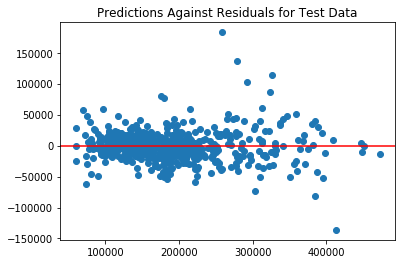

In [23]:
#scatter of actual prediction 
plt.scatter(predictions, residuals)
plt.axhline(0, color='r')
plt.title('Predictions Against Residuals for Test Data', loc = 'center');

#theres a distinct curve in the middle of our predictions 
#if there is a curve, there must be a non linear relationship 

In [24]:
#baseline is the mean 
d1['SalePrice'].mean()

181469.70160897123

In [25]:
#lets plot the baseline against the residuals 
residuals = y_test - d1['SalePrice'].mean()

In [26]:
residuals.shape

(616,)

In [30]:
#creating list for baseline predictions 
baseline = []
for i in range(1, 617):
    baseline.append(d1['SalePrice'].mean())

In [31]:
len(baseline)

616

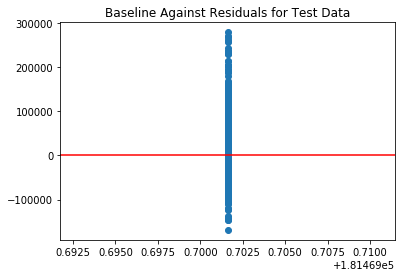

In [32]:
#baseline against residuals
plt.scatter(baseline, residuals)
plt.axhline(0, color='r')
plt.title('Baseline Against Residuals for Test Data', loc = 'center');

#theres a distinct curve in the middle of our predictions 
#if there is a curve, there must be a non linear relationship 

# Last Graph

In [33]:
#predicting y_test against predicted
pred = ridge.predict(X_test)

Text(0.5, 1.0, 'Test against Predictions')

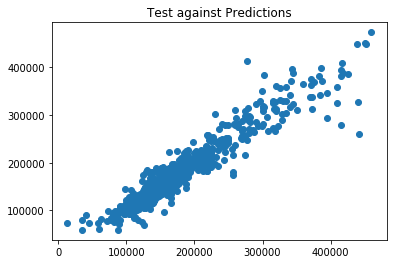

In [36]:
plt.scatter(y_test, pred)
plt.title('Test against Predictions', loc = 'center')

Text(0.5, 1.0, 'Train against Predictions')

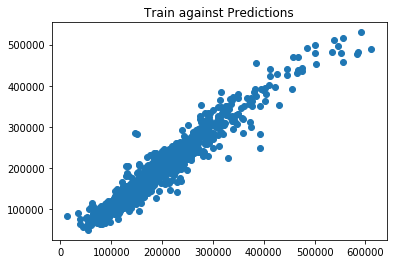

In [38]:
pred = ridge.predict(X_train)
plt.scatter(y_train, pred)
plt.title('Train against Predictions', loc = 'center')

#its pretty homskedastic 